<a href="https://colab.research.google.com/github/Gautam-Jaiswal/Stock-Project/blob/main/Stock_Prediction%2073%25%20t.s.%3D100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References :- 'https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/'

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
stock_name = input("Please enter Stock Name :- ")

Please enter Stock Name :- AAPL


#GETTING AND CLEANSING OF DATA

In [3]:
import pandas as pd
import numpy as np
from numpy import array
import yfinance as yf

from datetime import datetime

import plotly.graph_objects as go
import plotly.express as px

import urllib.request
from PIL import Image

from skimage import io

import matplotlib.pyplot as plt

In [4]:
df = yf.download(tickers=stock_name, period='5y' , interval='1d')
df_charts = yf.download(tickers=stock_name, period='5y' , interval='1d')

tick = yf.Ticker(stock_name)
share_holders = tick.institutional_holders
news = tick.news
info = tick.info

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Remove any null values if present

In [5]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
if(not all(df.isna().sum())):
  print('GOOD DATA-SET')
else:
  print('CLEARING DATA-SET.............')
  pd.df.dropna(axis = 0, how ='any', inplace=True)

GOOD DATA-SET


In [7]:
df.head(4)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-17,42.759998,42.847500,42.410000,42.537498,40.448898,87598000
2017-11-20,42.572498,42.639999,42.389999,42.494999,40.408493,65049600
2017-11-21,42.695000,43.424999,42.695000,43.285000,41.159698,100525200
2017-11-22,43.340000,43.750000,43.262501,43.740002,41.592354,102355600


In [8]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-10,141.240005,146.869995,139.500000,146.869995,146.869995,118854000
2022-11-11,145.820007,150.009995,144.369995,149.699997,149.699997,93903800
2022-11-14,148.970001,150.279999,147.429993,148.279999,148.279999,73374100
2022-11-15,152.220001,153.589996,148.559998,150.039993,150.039993,89868300
2022-11-16,149.130005,149.869995,147.289993,148.789993,148.789993,64218266


#EDA

In [9]:
info['longBusinessSummary']

'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. Further, it provides AppleCare support and cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Fitness+, a personalized fitness service; Apple Music, which offers users a curated listening experience with on-demand radio stations; Apple News+, a subscription news and magazine service; Apple TV+, which offers excl

In [10]:
fig_1 = go.Figure(data=[go.Candlestick(x=df_charts.index,
                open=df_charts['Open'],
                high=df_charts['High'],
                low=df_charts['Low'],
                close=df_charts['Close'])])
fig_1.update_layout(
    title=f'CANDLE STICK CHART FOR {stock_name} STOCK',
    yaxis_title='VALUE OF STOCK IN USD($)')

fig_1.show()

In [11]:
fig = px.line(df_charts, x=df_charts.index, y='High', title=f'LINE CHART OF {stock_name} STOCK')

fig.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [12]:
px.histogram(x = share_holders.Holder, y = share_holders.Value,
             color = share_holders.Holder,
             labels = {'x' : "Share Holder's Names", 'y': "Value of Shares"})

In [13]:
news_title = [None] *4
news_link = [None] *4
news_thumbnail = [None] *4
for i in range(0,4):
  news_title[i] = news[i]['title']
  news_link[i] = news[i]['link']
  news_thumbnail[i] = news[i]['thumbnail']['resolutions'][0]['url']

In [14]:
img = [None] *4
for i in range(0,4):
  urllib.request.urlretrieve(news_thumbnail[i], f'n{i}.png')
  temp = Image.open(f'n{i}.png')
  basewidth = 300
  wpercent = (basewidth / float(temp.size[0]))
  hsize = int((float(temp.size[1]) * float(wpercent)))
  img[i] = temp.resize((basewidth, hsize), Image.ANTIALIAS)

Target, Amazon and 4 More Retailers That Will Reward You for Turning in Your Old Stuff
https://finance.yahoo.com/news/target-amazon-4-more-retailers-130111844.html


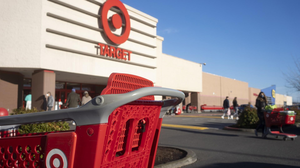

In [15]:
print(news_title[0])
print(news_link[0])
img[0]

Apple Store Staff Petition to Unionize a Third Store, This Time in St. Louis
https://finance.yahoo.com/news/apple-store-staff-petition-unionize-221444828.html


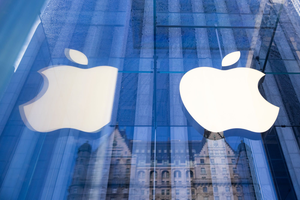

In [16]:
print(news_title[1])
print(news_link[1])
img[1]

3 Reasons to Buy Apple Stock in 2023 -- And Never Sell
https://finance.yahoo.com/m/61288489-6c7e-3226-b815-7bb5095fcd9b/3-reasons-to-buy-apple-stock.html


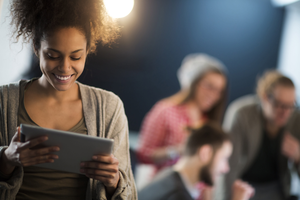

In [17]:
print(news_title[2])
print(news_link[2])
img[2]

Warren Buffett Stocks: What's Inside Berkshire Hathaway's Portfolio?
https://finance.yahoo.com/m/ce2ffe06-f882-3e0d-8b97-fa77d137e8bb/warren-buffett-stocks%3A-what%27s.html


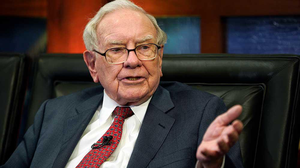

In [18]:
print(news_title[3])
print(news_link[3])
img[3]

#DATA PREPARATION FOR MODEL BUILDING

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
df_close_values = df.reset_index()['Close'][:-20]

In [81]:
scaler = MinMaxScaler(feature_range=(0,1))
df_close_values = scaler.fit_transform(np.array(df_close_values).reshape(-1,1))

In [82]:
##splitting dataset into train and test split
training_size = int(len(df_close_values)*0.8)
test_size = len(df_close_values)-training_size
train_data = df_close_values[0:training_size,:]
test_data = df_close_values[training_size:len(df_close_values),:1]

In [83]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [84]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [85]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# LSTM MODEL BUILDING

In [86]:
### Create the Stacked LSTM model
import math
from sklearn.metrics import mean_squared_error

import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [87]:
model = Sequential()
model.add(Dense(12, input_shape=(time_step,), activation='relu', use_bias=False))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=400, batch_size=32, verbose=1)

Epoch 1/400
28/28 [==============================] - 0s 3ms/step - loss: 0.0212
Epoch 2/400
28/28 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 3/400
28/28 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 4/400
28/28 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 5/400
28/28 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 6/400
28/28 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 7/400
28/28 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 8/400
28/28 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 9/400
28/28 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 10/400
28/28 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 11/400
28/28 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 12/400
28/28 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 13/400
28/28 [=================

In [88]:
'''model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')'''

"model=Sequential()\nmodel.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))\nmodel.add(LSTM(50,return_sequences=True))\nmodel.add(LSTM(50,return_sequences=True))\nmodel.add(LSTM(50))\nmodel.add(Dense(1))\nmodel.compile(loss='mean_squared_error',optimizer='adam')"

In [89]:
#model.summary()

In [90]:
#model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=2)

In [91]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [92]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [93]:
math.sqrt(mean_squared_error(y_train,train_predict))

90.25839214941338

In [94]:
math.sqrt(mean_squared_error(y_test,test_predict))

154.4782371684405

In [95]:
print(f'Performance measure for Training Data : {round(math.sqrt(mean_squared_error(y_train,train_predict)), 2)}')
print(f'Performance measure for Test Data : {round(math.sqrt(mean_squared_error(y_test,test_predict)), 2)}')

Performance measure for Training Data : 90.26
Performance measure for Test Data : 154.48


In [96]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size=64)
score

0.0007304588798433542

In [97]:
### Plotting 
look_back=time_step

# shift train predictions for plotting
trainPredictPlot = np.empty_like(df_close_values)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df_close_values)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close_values)-1, :] = test_predict

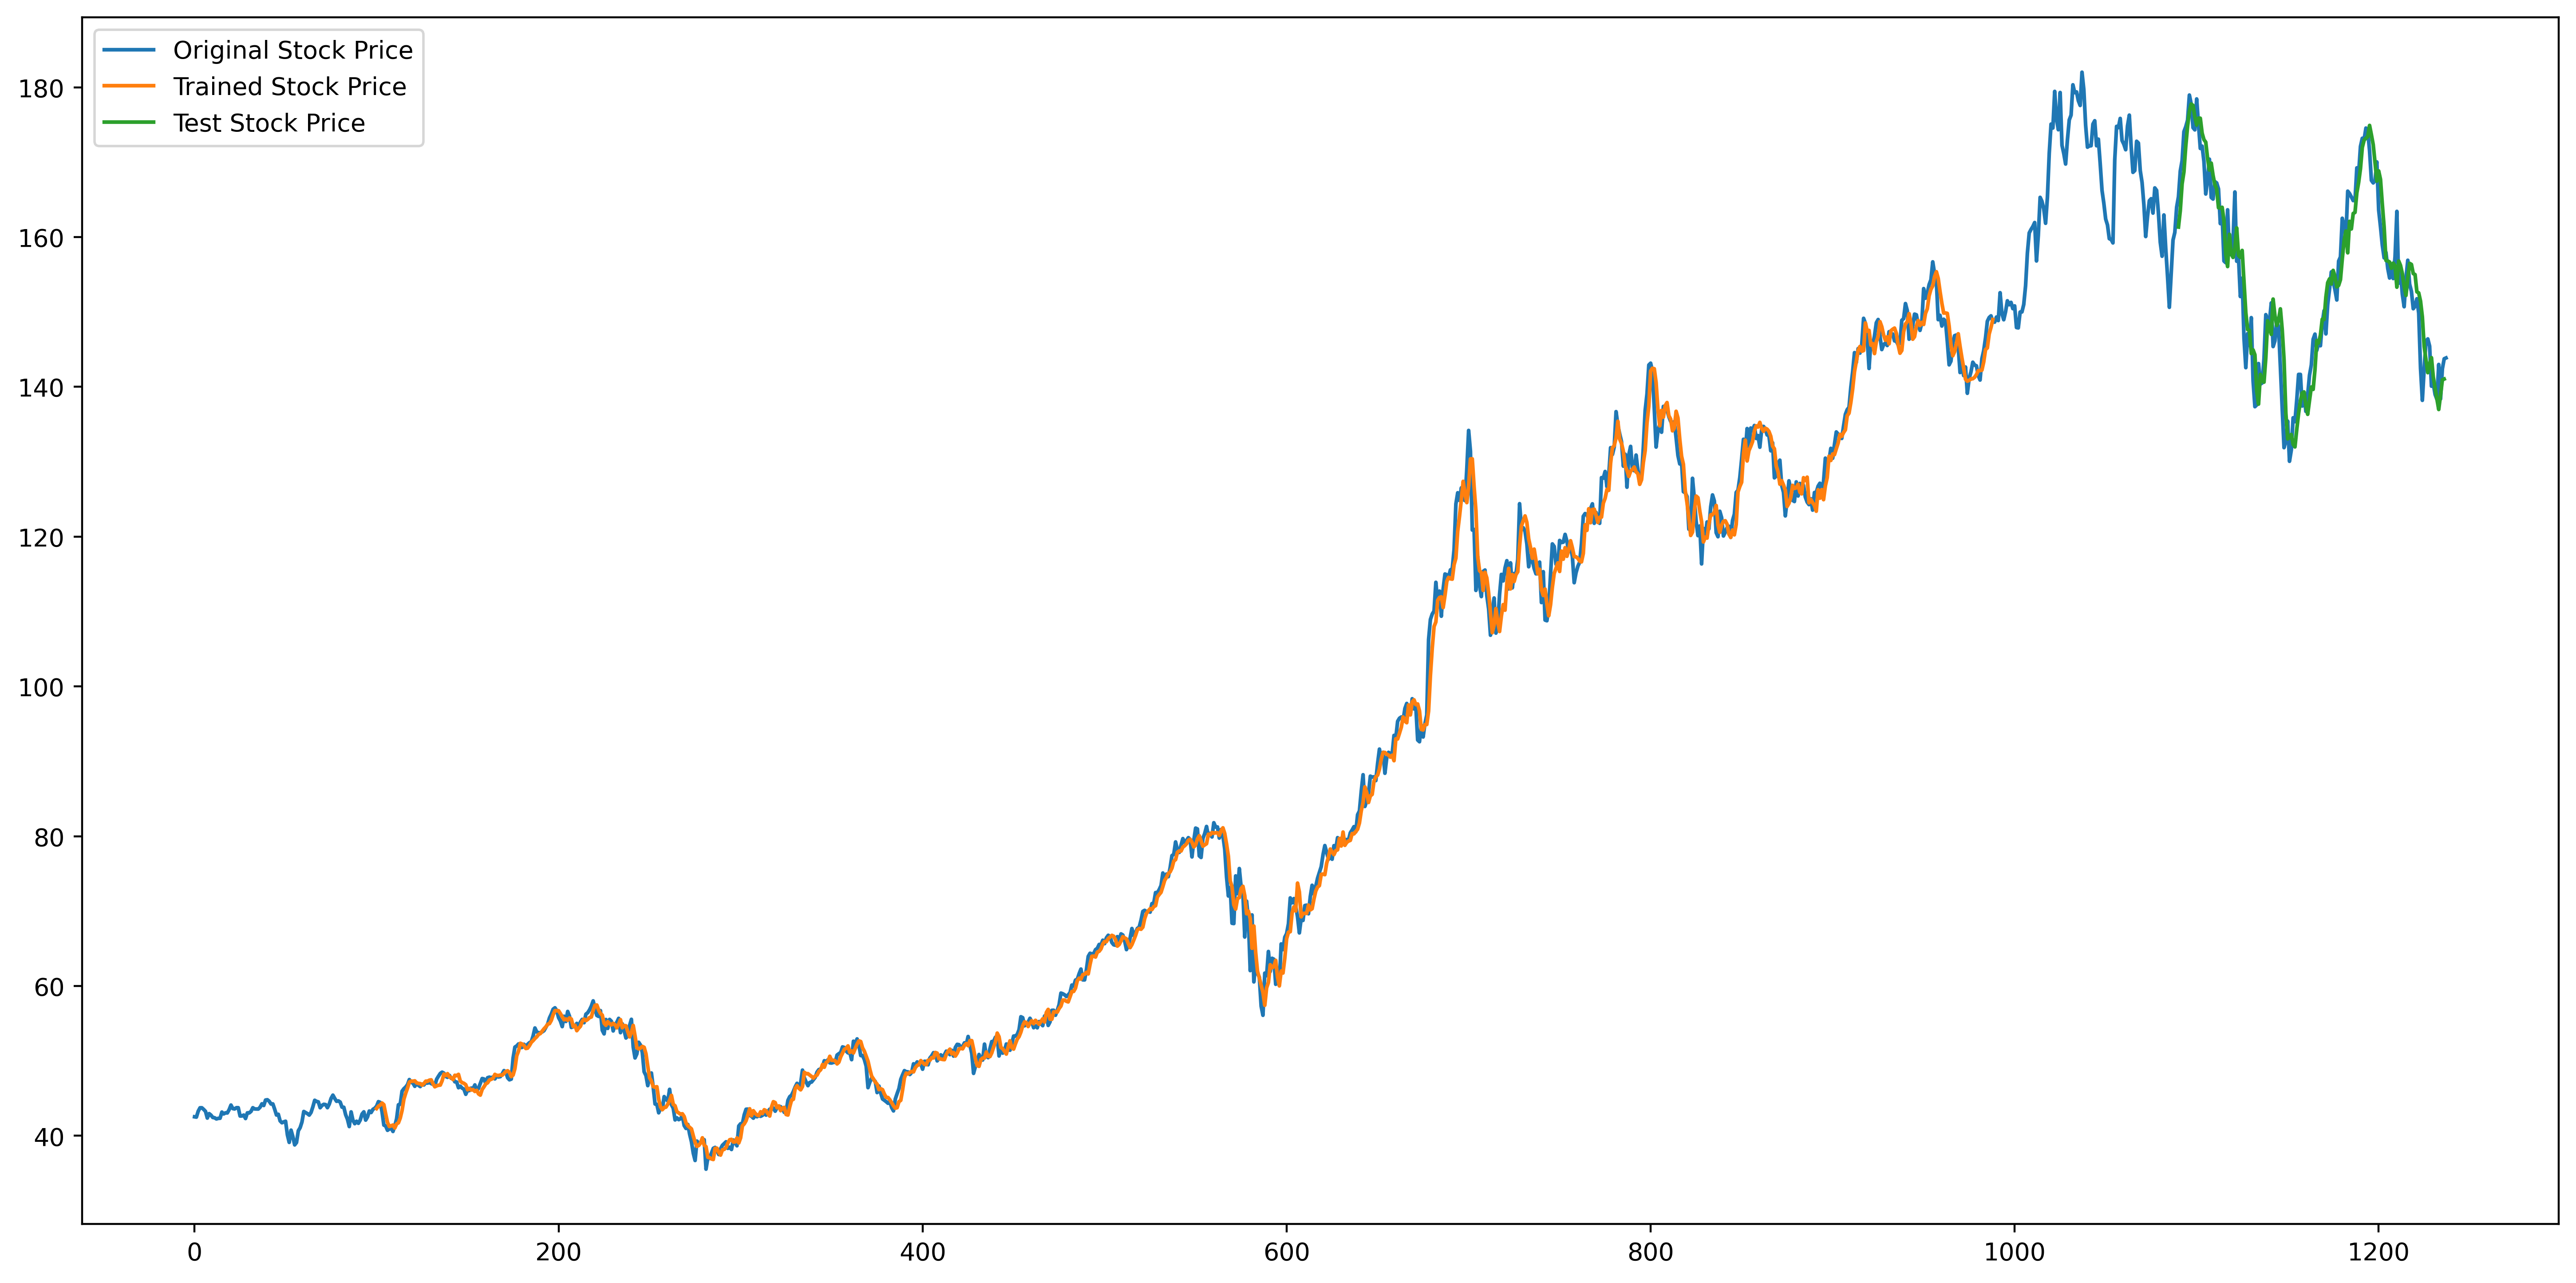

In [98]:
# plot baseline and predictions
plt.figure(dpi=400, figsize=(18, 9))
plt.plot(scaler.inverse_transform(df_close_values), label='Original Stock Price')
plt.plot(trainPredictPlot, label='Trained Stock Price')
plt.plot(testPredictPlot,  label='Test Stock Price')
plt.legend()
plt.show()

# Future Prediction

In [99]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)

In [100]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [101]:
# demonstrate prediction for next 20 days
lst_output=[]
n_steps=time_step
i=0
while(i<20):
    
    if(len(temp_input)>time_step):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

[0.7374364]


In [102]:
day_new=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+21)

# Graphical Output

In [103]:
df4 = df.reset_index()['Close'].tolist()

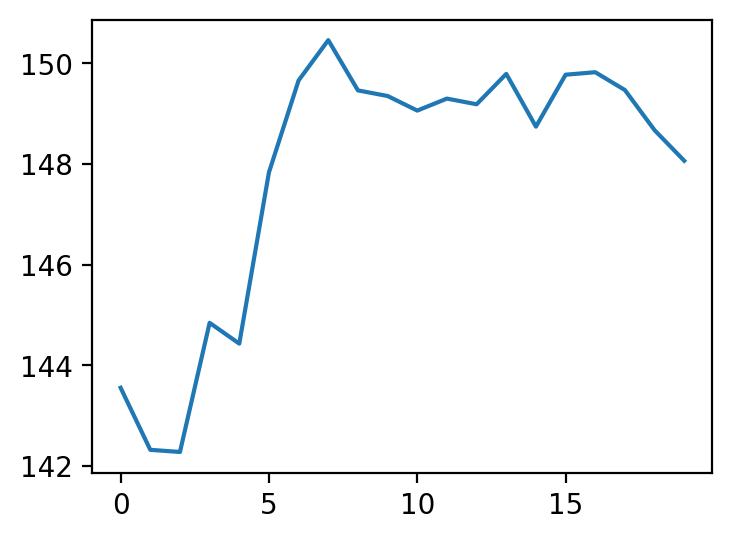

In [104]:
plt.figure(dpi=200, figsize=(4,3))
plt.plot(scaler.inverse_transform(lst_output))

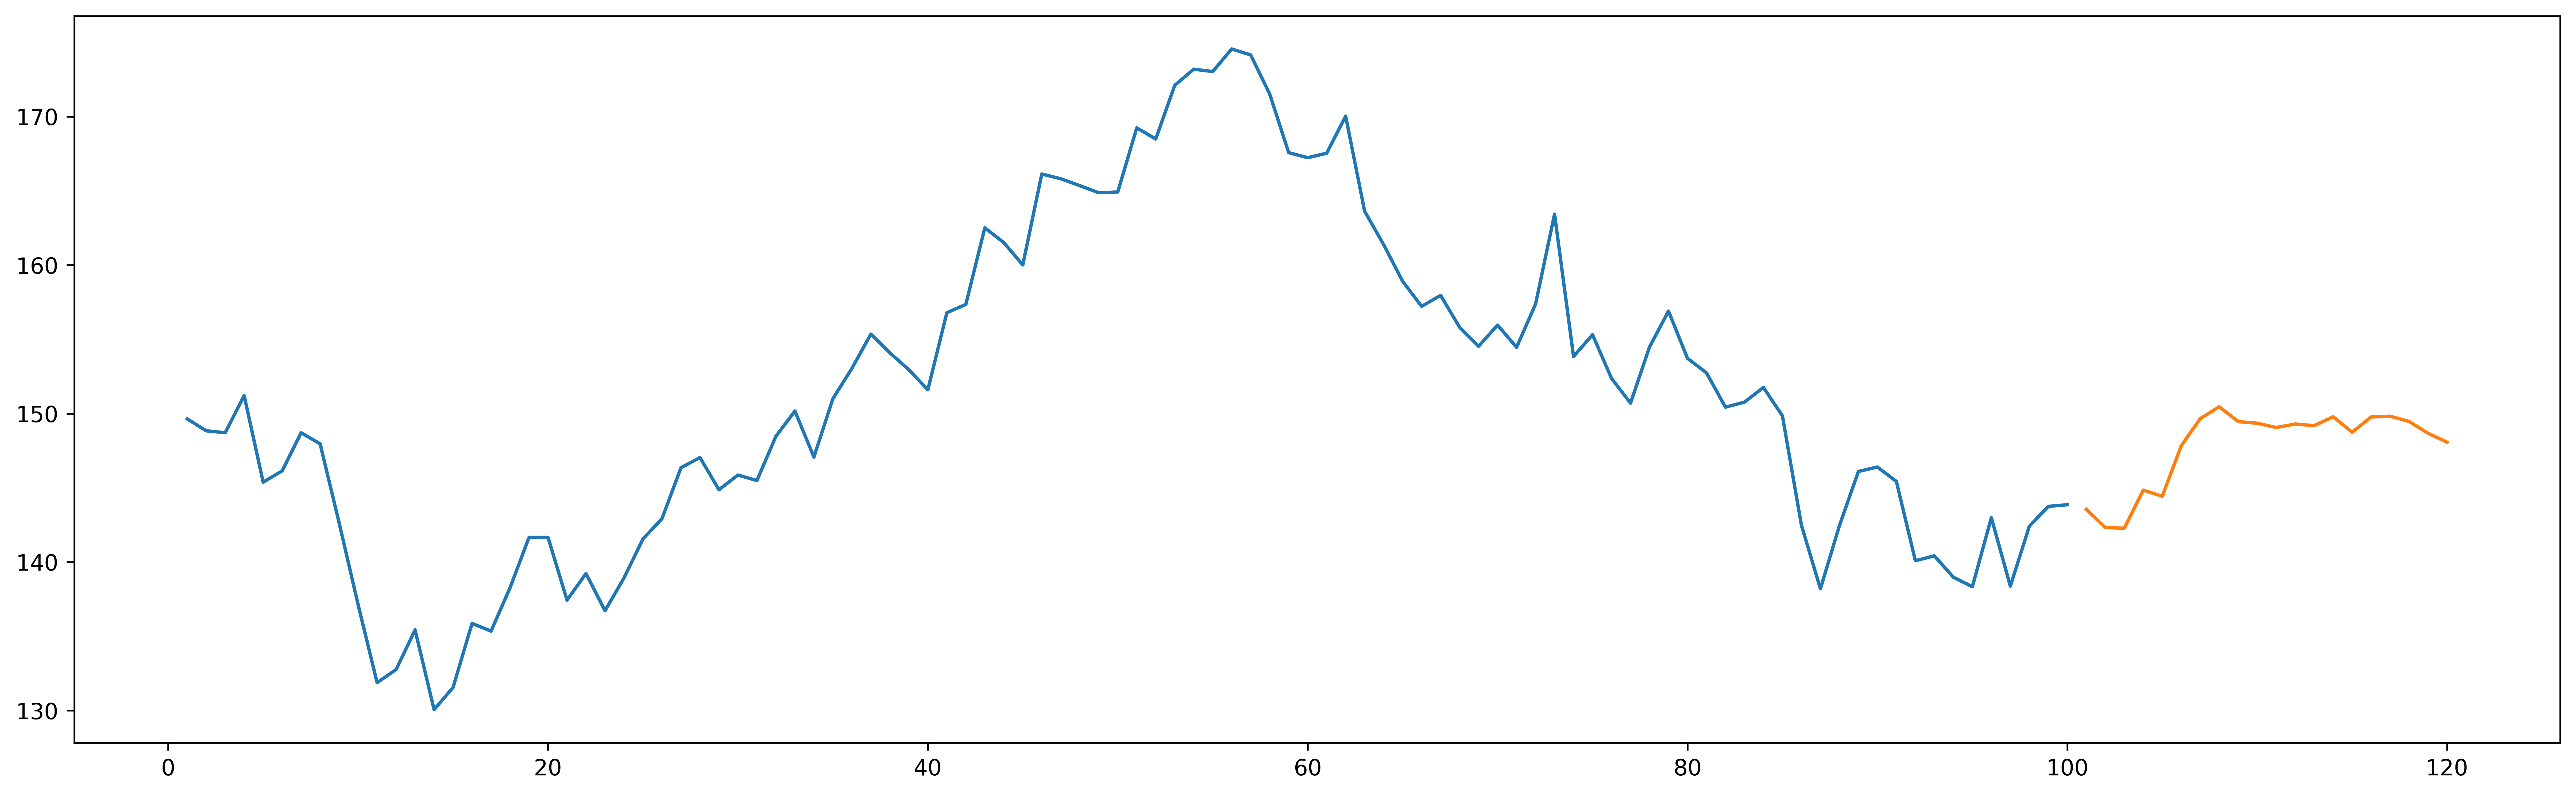

In [105]:
plt.figure(dpi=600, figsize=(20,6))

plt.plot(day_new,scaler.inverse_transform(df_close_values[len(df_close_values)-time_step:]) , label='STOCK PRICE')
plt.plot(day_pred,scaler.inverse_transform(lst_output) , label='FUTURE PREDICTED STOCK PRICE')

## GRAPHICAL COMPARSION WITH ORIGINAL VALUE

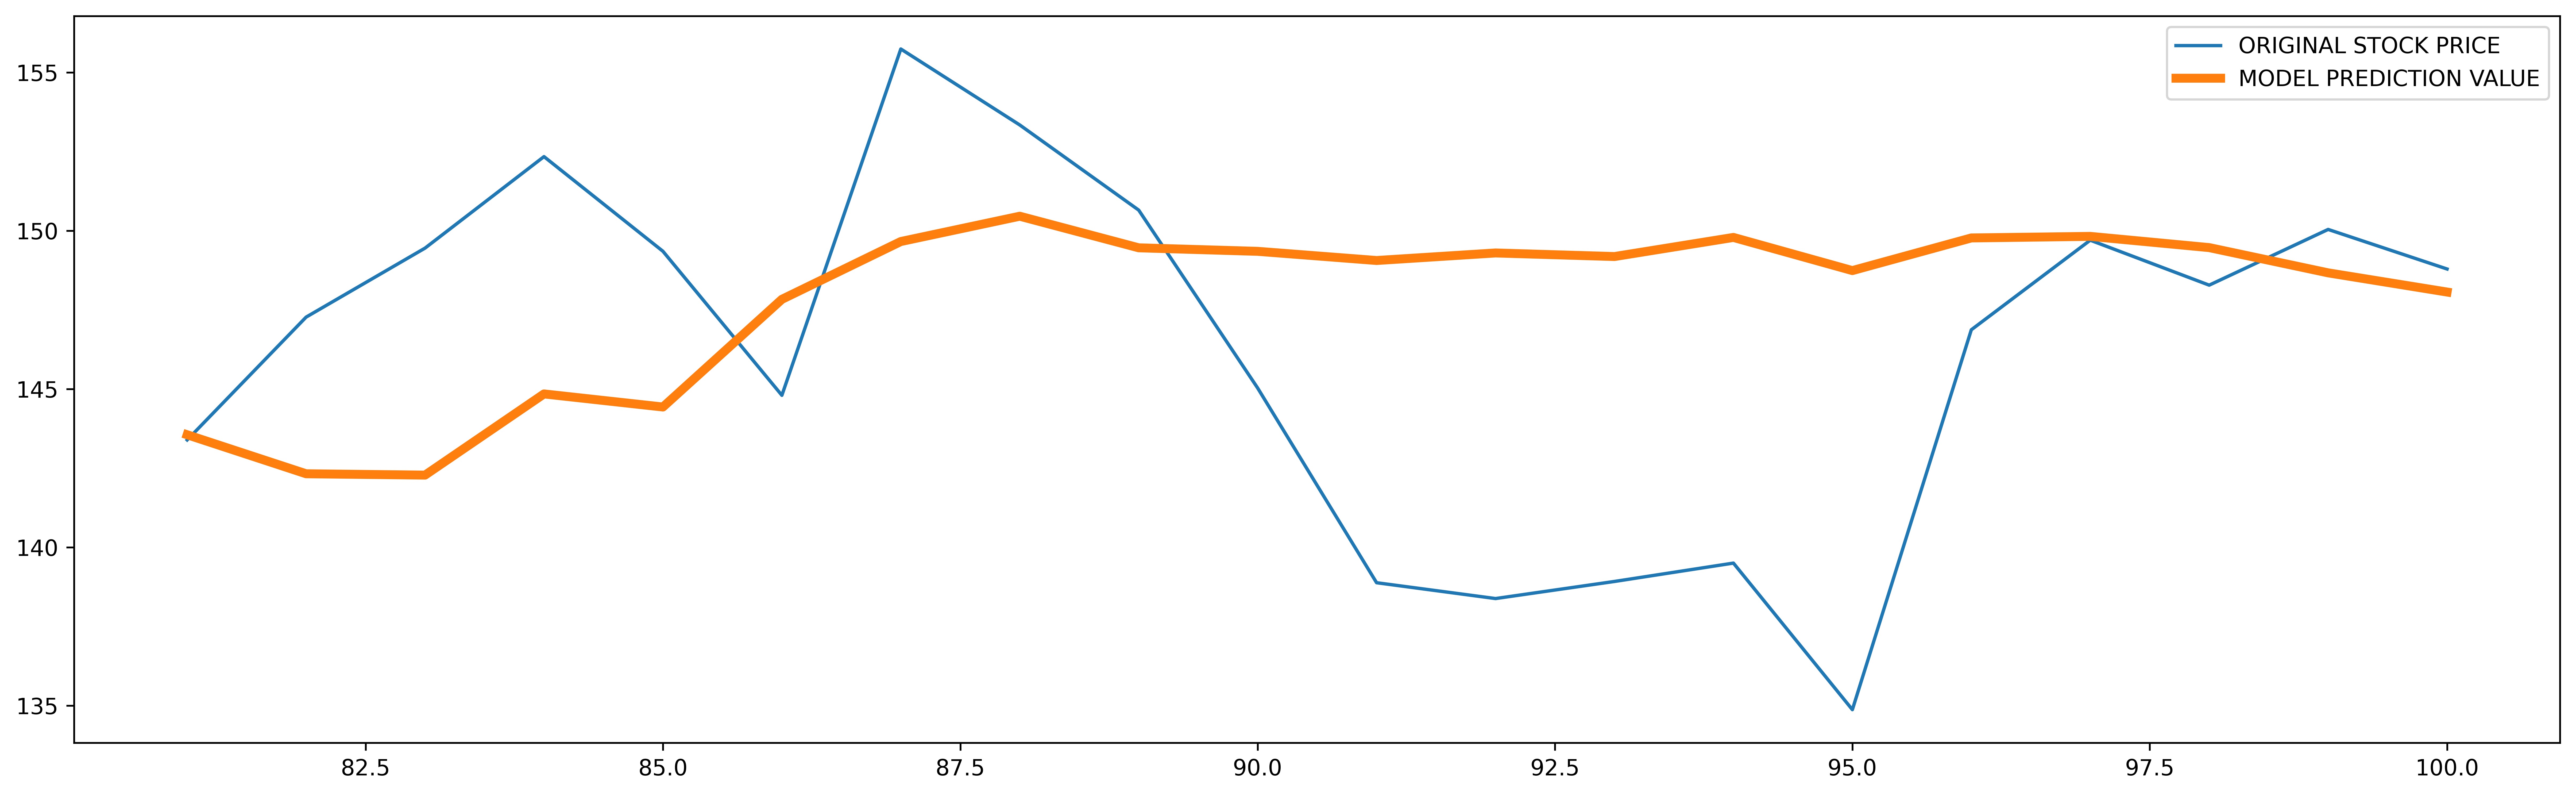

In [106]:
day_prediction = np.arange(time_step-19,time_step+1)

plt.figure(dpi=600, figsize=(20,6))

plt.plot(day_prediction,df4[len(df4)-20:], label='ORIGINAL STOCK PRICE')
plt.plot(day_prediction ,scaler.inverse_transform(lst_output) , label='MODEL PREDICTION VALUE', linewidth=4)
plt.legend()
plt.show()

In [107]:
'''day_prediction = np.arange(time_step-19,time_step+1)

plt.figure(dpi=600, figsize=(20,6))

plt.plot(day_new,df4[len(df4)-time_step:], label='ORIGINAL STOCK PRICE')
plt.plot(day_prediction ,scaler.inverse_transform(lst_output) , label='MODEL PREDICTION VALUE', linewidth=4)
plt.legend()
plt.show()'''

"day_prediction = np.arange(time_step-19,time_step+1)\n\nplt.figure(dpi=600, figsize=(20,6))\n\nplt.plot(day_new,df4[len(df4)-time_step:], label='ORIGINAL STOCK PRICE')\nplt.plot(day_prediction ,scaler.inverse_transform(lst_output) , label='MODEL PREDICTION VALUE', linewidth=4)\nplt.legend()\nplt.show()"